# Частные производные
На прошлой лекции мы рассмотрели некоторые способы поиска минимума функции от нескольких параметров. Все они требовали вычисления производных. 
Производная от функции, зависящей от нескольких параметров, по одному называется - частной производной.

Расмотрим функцию $f(x_1, x_2, \ldots x_n)=f(\vec{x})$. 

Тогда частная производная по переменной $x_1$ обозначается 

$$\frac{\partial f(\vec{x})}{\partial x_1}$$

Аналогично записываются переменные по остальным переменным:

$$\frac{\partial f(\vec{x})}{\partial x_2},\; \ldots,\; \frac{\partial f(\vec{x})}{\partial x_n}$$

Основное отличие частной производной от "обычной" - при вычислении частной производной по переменной $z$ мы считаем все остальные переменные константами. 

В остальном действуют те же правила, что и при вычислении производных от одной переменной.


###Примеры вычисления частных производных
*  ** Функция от двух переменных №1**                                                                                                                    
    $$f(x,y)=5y^3+x^2$$
    
    $$\frac{\partial f(x, y)}{\partial x}=\frac{\partial (x^2+5y^3)}{\partial x}=\frac{\partial x^2}{\partial x}+\frac{\partial 5y^3}{\partial x}=2x+0=2x$$
    Здесь мы учли, что второе слагаемое не содержит $x$, а значит является просто константой.
    
    **Задание** 
    
    Вычислить
    $$\frac{\partial f(x, y)}{\partial y}$$
    


*  ** Функция от двух переменных №2**
    $$f(x,y)=3\cdot \tan(x\cdot y)\cdot \cos(x^2)$$
    
    $$\frac{\partial f(x,y)}{\partial y}=\frac{\partial (3\cdot \tan(x\cdot y)\cdot \cos(x^2))}{\partial y}=3\cdot \cos(x^2)\cdot \frac{\partial \tan(x\cdot y)}{\partial y}=$$
    
    $$=3\cdot \cos(x^2)\cdot \frac{1}{\cos^2(x\cdot y)}\cdot \frac{\partial (x\cdot y)}{\partial y}=3\cdot \cos(x^2)\cdot \frac{x}{\cos^2(x\cdot y)}$$
    **Задание** 
    
    Вычислить
    $$\frac{\partial f(x, y)}{\partial x}$$

При решении заданий может пригодится  [таблица производных](https://ru.wikipedia.org/wiki/Таблица_производных)
    
##Градиент
Для удобства все производные обединяют в вектор, который называется градиентом функции:

$$grad(f(\vec{x})) =\vec{\nabla}f(\vec{x}) =(\frac{\partial f(\vec{x})}{\partial x_1},\; \ldots,\; \frac{\partial f(\vec{x})}{\partial x_n})$$

Такой вектор показывает направление быстрейшего возрастания функции:
 ![alt text](https://raw.githubusercontent.com/mlforschool/lessons/master/4%20Gradient%20Descent/images/gradient-direction.png)
 https://www.learnopencv.com/understanding-activation-functions-in-deep-learning/
 
##Градиентный спуск

Если мы возьмем вектор градиента с минусом:
$$-\vec{\nabla}f(\vec{x})$$
то он будет указывать направление, в котором функция убывает быстрее всего.

Для поиска минимума функции надо сделать шаг в направлении, которое указывает $-\vec{\nabla}f(\vec{x})$. Какого размера шаг можно сделать?

Производные и градиент определяют свойства функции только рядом с той точкой, в которой мы их посчитали. Поэтому шаг должен быть маленьким. При большой величине шага могут возникнуть "проблемы":

![alt text](https://raw.githubusercontent.com/mlforschool/lessons/master/4%20Gradient%20Descent/images/large_steps.png)
http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote07.html

Размер шага мы определяем параметром $\alpha$:

$$x_1^i=x_1^{i-1}-\alpha\cdot\frac{\partial f(\vec{x}^{i-1})}{\partial x_1}$$

Аналогичные выражения мы можем записать и для всех остальных переменных.
$$x_2^i=x_2^{i-1}-\alpha\cdot\frac{\partial f(\vec{x}^{i-1})}{\partial x_2}$$
$$x_3^i=x_3^{i-1}-\alpha\cdot\frac{\partial f(\vec{x}^{i-1})}{\partial x_3}$$
$$\ldots$$

Для удобства мы можем перейти к векторной записи:
$$\vec{x}^{i}=\vec{x}^{i-1}-\alpha\cdot\vec{\nabla} f(\vec{x}^{i-1})$$

Здесь подразумевается поэлементное вычитание векторов.

После нескольких шагов при правильном размере шага, алгоритм достигнет окрестности локального минимума:![alt text](https://raw.githubusercontent.com/mlforschool/lessons/master/4%20Gradient%20Descent/images/gradient-descent.png)
https://link.medium.com/fCTb5CuLPU

Как нам определить, когда мы оказались в окрестности локального минимума?

Критерий остановки:
$$|f(\vec{x}^{i})-f(\vec{x}^{i-1})|<\epsilon$$
где $\epsilon$ - заранее заданный малый параметр.

В итоге алгоритм может быть сформулирован следующим образом:



1.   Задать начальные значения всех переменных: $\vec{x}^0$
2.   Выполнить шаг градиентного спуска:

    $\vec{x}^{i}=\vec{x}^{i-1}-\alpha\cdot\vec{\nabla} f(\vec{x}^{i-1})$
3. Проверить критерий остановки:
    $|f(\vec{x}^{i})-f(\vec{x}^{i-1})|<\epsilon$
    
    Если он невыполнен, то перейти на шаг 2, иначе завершить алгоритм.

В некоторых случаях алгоритм с таким критерием может не сойтись. Такое возможно, например, если выбрано слишком большое значение параметра $\alpha$ или функция f "плохая". В таком случае алгоритм останавливается на заданном шаге.
 

Напишем реализацию алгоритма градиентного спуска.

In [0]:
# подключаем библиотеки для построения графиков
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [0]:
def gradient_descent(initial_point, alpha=0.01, epsilon=10**-7, max_step=100,
                     f=f, grad_f=grad_f):
    # массивы для хранения пути
    x_points = []
    y_points = []
    
    # начальная точка
    cur_x, cur_y = initial_point
    cur_step = 0
    # сохраняем текущую точку для отображения пути
    x_points.append(cur_x)
    y_points.append(cur_y)
    
    next_step = True
    while next_step and cur_step < max_step:
        # номер шага
        cur_step += 1
        # на новом шаге текущая точка становится предыдущей
        previous_x, previous_y = cur_x, cur_y
        
        # вычисляем производные
        dfx, dfy = grad_f(previous_x, previous_y)
        
        # вычиcляем новые точки
        cur_x = previous_x - alpha * dfx
        cur_y = previous_y - alpha * dfy
        
        # сохраняем текущую точку для отображения пути
        x_points.append(cur_x)
        y_points.append(cur_y)
        
        
        #print(abs(f(cur_x, cur_y) - f(previous_x, previous_y)))
        # проеряем критерий остановки
        if abs(f(cur_x, cur_y) - f(previous_x, previous_y)) < epsilon:
            next_step = False
    return x_points, y_points, cur_step

In [0]:
# строит график функции, и градиентного спуска, можно задавать функцию
def plot_path(x_position, y_position, angle_1=45, angle_2=45, f=f):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(angle_1, angle_2)

    # Создаем массив точек, в которых мы вычислим функцию ошибки
    X = np.arange(-5, 5, 0.25)
    Y = np.arange(-5, 5, 0.25)
    X, Y = np.meshgrid(X, Y)

    # Настраиваем ось Z 
    ax.set_zlim(0.01, 10.)

    # Вычисляем значения функции ошибки
    Z = f(X,Y)
    
    # Выводим поверхность функции ошибки
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    
    # Добавляем цветовую шкалу
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    # Преобразуем исходные координаты в массивы numpy
    xx = np.array(x_position)
    yy = np.array(y_position)
    
    # Вычисляем функцию ошибки в точках градиентного спуска
    zz = f(xx, yy)
    
    # График градиентного спуска
    ax.plot(xx, yy, zz, 'ro-', alpha=0.5) # note the 'ro' (no '-') and the alpha
    
    # Показываем все графики
    plt.show()

In [0]:
# зададим функцию
def f(x, y):
    return 0.2*(x**2+y**2)

# и ее производные 
def grad_f(x, y):
    return 0.4*x, 0.4*y

# другая функция
def f2(x, y):
    return 0.1*(3*x**2+y**2)
# и ее производные
def grad_f2(x, y):
    return 0.6*x, 0.2*y

In [0]:
# Начальная точка
initial_point = (1, 4)

# Градиентный спуск, передаем функцию и производные в качестве параматров
x_points, y_points, cur_step = gradient_descent(initial_point,alpha=0.1,
                                                f=f2, grad_f=grad_f2)

Количество шагов: 17


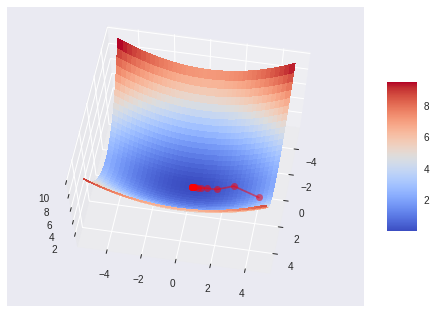

In [53]:
print("Количество шагов:", cur_step)
plot_path(x_points, y_points, angle_1=65, angle_2=10, f=f2 )

**Задание**
* Выбрать (на свой вкус) параметры $a$ и $b$ ($a\ne b$)для функции $f(x,y)=a\cdot x^2+b\cdot y^2$. Либо можно выбрать собственную функцию, у которой есть локальный минимум. 

* Для выбранной функции написать на python две функции, которые возвращают значение функции и ее частные производные. 

* Затем выбрать начальную точку и определить наилучшее значение параметра $\alpha$: значение, при котором градиентный спуск сходится за наименьшее количество шагов. Показать, что при "соседних" значениях параметра $\alpha$ спуск идет дольше. Чаще всего значания  параметра $\alpha$ перебирают из следующего ряда: [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]. При необходимости его продолжить в каждую сторону.
* Определить минимальное значение параметра $\alpha$, при котором градиентный спуск расходится.